In [1]:
import pandas as pd

In [3]:
elevation_data = pd.read_csv('data/SPR_TotET6yrmean_elev_long.csv')
et_data = pd.read_csv('data/SPR_TotET6yrmean_elev_wide.csv')

Index(['Unnamed: 0', 'Distance_km', 'Elev_m', 'TotET_mm', 'slope_pct'], dtype='object')


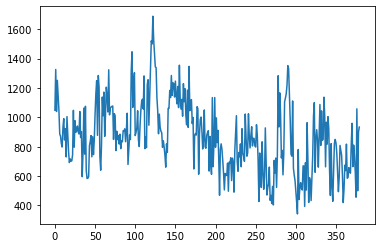

In [113]:
print(et_data.columns)
data = et_data.TotET_mm
data.plot()

coeff of determination: 0.2752573344072893
intercept: 8.64708150341551
slope: [-0.84050977]


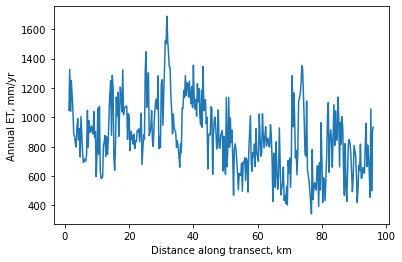

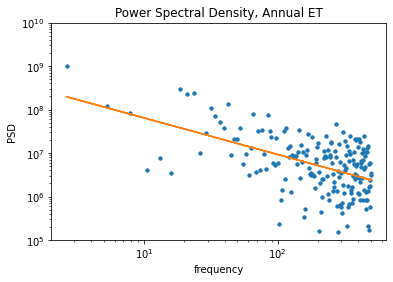

[190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  5

In [115]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
time = np.arange(len(data)) / fs
x = data

# Divide the time series into frequencies:
freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs[:])

# Power spectral density is square of fft:
ps = np.abs(np.fft.fft(data))**2

# Setup the data for fitting a log-log linear trend:
x = freqs[idx]
y = ps[idx]
y_ok = y[~(x==0)]
x_ok = x[~(x==0)]

x_fit = np.array(np.log10(abs(x_ok))).reshape((-1, 1))
y_fit = np.array(np.log10(y_ok))

# Fit the linear log-log model:
model = LinearRegression()
model.fit(x_fit,y_fit)

r_sq = model.score(x_fit, y_fit)
print('coeff of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Get predicted y values from model:
y_pred = model.predict(x_fit)

plt.figure()
plt.plot(et_data.Distance_km, et_data.TotET_mm)
plt.xlabel('Distance along transect, km')
plt.ylabel('Annual ET, mm/yr')

plt.figure()
plt.plot(abs(freqs[idx]), ps[idx], '.')
plt.plot(pow(10,x_fit), pow(10,y_pred))
plt.title('Power Spectral Density, Annual ET')
plt.yscale('log')
plt.xscale('log')
plt.ylim((1e5, 1e10))
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.show()

print(idx)

coeff of determination: 0.2752573344072893
intercept: 8.64708150341551
slope: [-0.84050977]


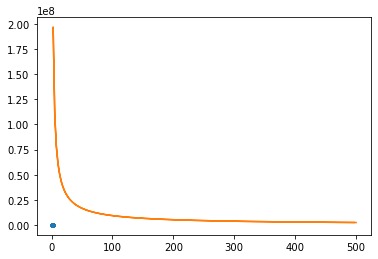

In [107]:
from sklearn.linear_model import LinearRegression

x = freqs[idx]
y = ps[idx]
y_ok = y[~(x==0)]
x_ok = x[~(x==0)]


x_fit = np.array(np.log10(abs(x_ok))).reshape((-1, 1))
y_fit = np.array(np.log10(y_ok))

model = LinearRegression()
model.fit(x_fit,y_fit)

r_sq = model.score(x_fit, y_fit)
print('coeff of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x_fit)

plt.figure()
plt.plot(x_fit, y_fit, '.')
plt.plot(pow(10,x_fit), pow(10,y_pred))


Text(0.5, 1.0, 'Power spectrum (np.fft.fft)')

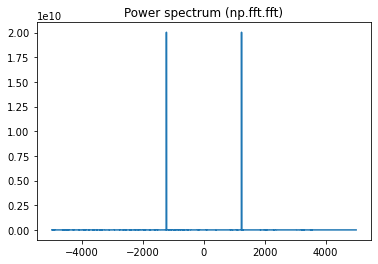

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

# np.fft.fft
freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2
plt.figure()
plt.plot(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')